Image_Count:60000 Solution:28*28
Label_Count:60000


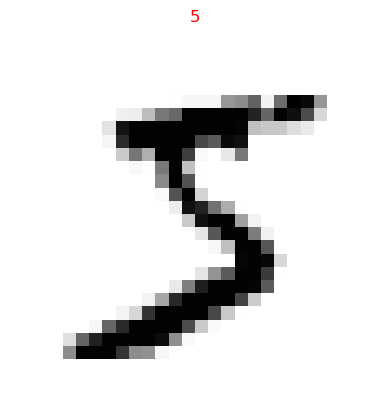

In [1]:
import torch
import matplotlib.pyplot as plt
import struct
import os


def save_mnist_pic(image_dir,label_dir,save_img_count,store_dir='.\\img\\'):
    with open(image_dir,'rb') as fp:
        image_info=struct.unpack('>IIII',fp.read(4*4))
        if image_info[0] != 0x0803:
            print("not a mnist file!")
            return None,None
        print("Image_Count:%d Solution:%d*%d"%(image_info[1],image_info[2],image_info[3]))
        raw_image = fp.read()
        pic = torch.zeros(image_info[1],image_info[2],image_info[3])
        for i in range(image_info[1]):
            x = raw_image[i*28*28:(i+1)*28*28]
            x = torch.tensor(list(x)).reshape(28,28)
            pic[i,:,:]=x
    with open(label_dir,'rb') as fp:
        label_info=struct.unpack('>II',fp.read(4*2))
        if label_info[0] != 0x0801:
            print("not a label file!")
            return
        print("Label_Count:%d"%(label_info[1]))
        if label_info[1] != image_info[1]:
            print("the label count is not same as the image count!")
            return None,None
        raw_label = fp.read()
        label = list(raw_label)
    os.makedirs(store_dir,exist_ok=True)
    for i in range(save_img_count):
        plt.imsave(store_dir+str(i)+'.jpg',pic[i],cmap='Greys')
    return pic,label


train_mnist_pic_dir = os.path.join('./MNIST/MNIST/raw/train-images-idx3-ubyte')
train_mnist_label_dir = os.path.join('./MNIST/MNIST/raw/train-labels-idx1-ubyte')

test_mnist_pic_dir = os.path.join('./MNIST/MNIST/raw/t10k-images-idx3-ubyte')
test_mnist_label_dir = os.path.join('./MNIST/MNIST/raw/t10k-labels-idx1-ubyte')


pic,label= save_mnist_pic(train_mnist_pic_dir,train_mnist_label_dir,0)
plt.title(str(label[0]),color='r')
plt.axis('off')
plt.imshow(pic[0],cmap='Greys')
plt.show()

torch.Size([26, 26])


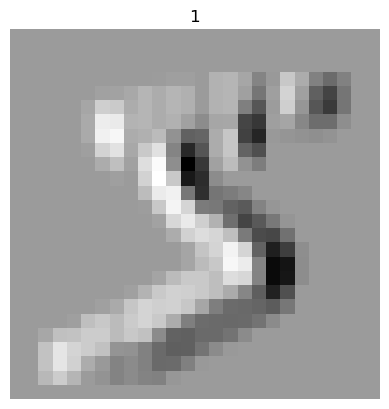

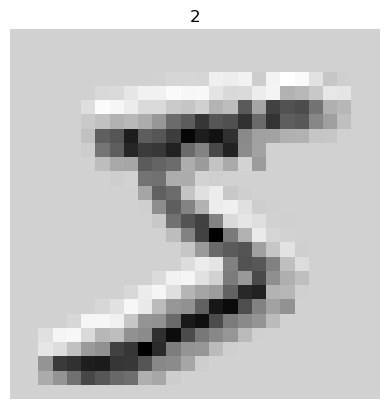

In [2]:
def show_img(img,label):
    fig,axes = plt.subplots(1,1) 
    axes.imshow(img,cmap="Greys")
    axes.set_title(label)
    axes.axis('off')
    plt.show()

def corr2D(target,kelnel,stride=1,padding=0):
    ret_shape = torch.tensor(target.shape) - torch.tensor(kelnel.shape) + 1 + padding * 2
    ret_shape = tuple(ret_shape)
    shape = kelnel.shape
    ret = torch.zeros(ret_shape)
    for i in range(ret_shape[0]):
        for j in range(0,ret_shape[1],stride):
            ret[i][j] = (kelnel*target[i:i+shape[0],j:j+shape[1]]).sum()
    return ret

kelnel = torch.tensor([[1,0,-1],[1,0,-1],[1,0,-1]])
target = pic[0]
ans = corr2D(target,kelnel,1,0)
cov = torch.nn.Conv2d(1,1,(3,3),1,0)
cov.kernel_size
ans2 = cov(target.unsqueeze(0))
print(ans.shape)
show_img(ans,'1')
show_img(ans2.detach().squeeze().numpy(),'2')

In [9]:
x = torch.arange(16).resize(1,1,4,4)
print(x)
pool = torch.nn.MaxPool2d(3,1)
y = pool(x)
print(y)

tensor([[[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11],
          [12, 13, 14, 15]]]])
tensor([[[[10, 11],
          [14, 15]]]])


c:\Users\Gancenty\.conda\envs\pytorch_cpu\Lib\site-packages\torch\_tensor.py:836: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
